In [1]:
#import functions
import mne
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
from mne_bids import BIDSPath, read_raw_bids, print_dir_tree, make_report
from mne_bids.path import get_bids_path_from_fname
from ecog_preproc_utils import transformData
from GetData import getSubjects, getData

In [15]:
## Setup variables
data_dir = "/home/jovyan/aws_ds003688/"
sess = 'iemu'
task = 'film'
acq = 'clinical'
run = "1"

In [16]:
subjects=getSubjects(data_dir)

print(subjects)

['sub-07', 'sub-09', 'sub-60', 'sub-14', 'sub-16', 'sub-18', 'sub-22', 'sub-24', 'sub-27', 'sub-41', 'sub-45', 'sub-51', 'sub-46', 'sub-55']


In [17]:
subj = 'sub-22'
subj_data=getData(subj, data_dir, sess, task, acq, run)
bids_path=subj_data.getBidsPath()
hg_data=subj_data.getHGData()
#car_data=subj_data.getCARData().get_data()

Opening raw data file /home/jovyan/aws_ds003688//derivatives/HighGamma/sub-22_ses-iemu_task-film_acq-clinical_run-1_HighGamma_raw.fif...
Isotrak not found
    Range : 0 ... 50936 =      0.000 ...   509.360 secs
Ready.


In [18]:
events = mne.events_from_annotations(hg_data, event_id='auto')
events

Used Annotations descriptions: ['end task', 'music', 'speech', 'start task']


(array([[ 3462,     0,     4],
        [ 3463,     0,     2],
        [ 6463,     0,     3],
        [ 9463,     0,     2],
        [12463,     0,     3],
        [15464,     0,     2],
        [18464,     0,     3],
        [21464,     0,     2],
        [24465,     0,     3],
        [27465,     0,     2],
        [30465,     0,     3],
        [33465,     0,     2],
        [36466,     0,     3],
        [39466,     0,     2],
        [42472,     0,     1]]),
 {'end task': 1, 'music': 2, 'speech': 3, 'start task': 4})

In [19]:
music = mne.Epochs(hg_data, events=events[0], tmin=-0.2, tmax=5, event_id=[2]).get_data()
speech = mne.Epochs(hg_data, events=events[0], tmin=-0.2, tmax=5, event_id=[3]).get_data()

Not setting metadata
7 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 7 events and 521 original time points ...
0 bad epochs dropped
Not setting metadata
6 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 6 events and 521 original time points ...
0 bad epochs dropped


In [26]:
music.shape

(7, 45, 521)

In [27]:
def mean_epoched_corr (epochs):
    trial_num = epochs.shape[0]
    chan_num = epochs.shape[1]
    
    corr = np.zeros((trial_num, chan_num, chan_num))
    
    for triali in range(0, epochs.shape[0]):
        corr [triali, :, :] = np.corrcoef(epochs[triali,:,:])
    
    mean_corr = np.mean(corr, axis = 0)
    return mean_corr
          



In [30]:
hg_music_corr = mean_epoched_corr(music)
hg_speech_corr= mean_epoched_corr(speech)


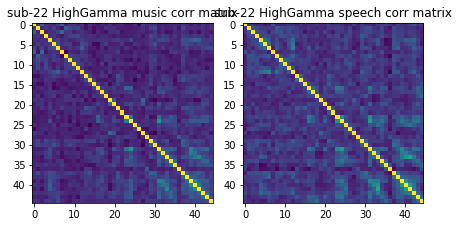

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(hg_music_corr)
ax2.imshow(hg_speech_corr)
ax1.set_title(subj + " HighGamma music corr matrix")
ax2.set_title(subj + " HighGamma speech corr matrix")
plt.tight_layout()